In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


In [2]:
df = pd.read_csv('synthetic_energy_data.csv')
df.head()

,Date,State,Population,GDP (in trillions),Peak Demand (MW),Peak Production (MW),Solar Production (MW),Coal Production (MW),Wind Production (MW),Nuclear Production (MW),Total Production (MW)
0,2018-01-01,Andhra Pradesh,5.000000e+06,2.000000,5147.114454,4985.516313,1053.196651,3112.061500,833.842930,519.138346,5518.239427
1,2018-01-02,Andhra Pradesh,5.000055e+06,2.001096,5246.606670,5055.903687,1059.802897,3077.481663,835.144314,511.787250,5484.216123
2,2018-01-03,Andhra Pradesh,5.000110e+06,2.002192,5149.916502,4965.592809,1059.569712,3102.563170,837.037006,515.209502,5514.379390
3,2018-01-04,Andhra Pradesh,5.000165e+06,2.003287,5226.880796,4995.102064,1055.331175,3109.560356,835.135761,516.741874,5516.769166
4,2018-01-05,Andhra Pradesh,5.000220e+06,2.004383,5123.932547,4993.068193,1057.598079,3106.766341,837.161825,514.313609,5515.839854


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60258 entries, 0 to 60257
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     60258 non-null  object 
 1   State                    60258 non-null  object 
 2   Population               60258 non-null  float64
 3   GDP (in trillions)       60258 non-null  float64
 4   Peak Demand (MW)         60258 non-null  float64
 5   Peak Production (MW)     60258 non-null  float64
 6   Solar Production (MW)    60258 non-null  float64
 7   Coal Production (MW)     60258 non-null  float64
 8   Wind Production (MW)     60258 non-null  float64
 9   Nuclear Production (MW)  60258 non-null  float64
 10  Total Production (MW)    60258 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.1+ MB


In [4]:
cols = df.columns

In [5]:
cols

Index(['Date', 'State', 'Population', 'GDP (in trillions)', 'Peak Demand (MW)',
       'Peak Production (MW)', 'Solar Production (MW)', 'Coal Production (MW)',
       'Wind Production (MW)', 'Nuclear Production (MW)',
       'Total Production (MW)'],
      dtype='object')

In [6]:
df.describe()

,Population,GDP (in trillions),Peak Demand (MW),Peak Production (MW),Solar Production (MW),Coal Production (MW),Wind Production (MW),Nuclear Production (MW),Total Production (MW)
count,6.025800e+04,60258.000000,60258.000000,60258.000000,60258.000000,60258.000000,60258.000000,60258.000000,60258.000000
mean,1.304441e+07,2.501491,5383.659321,5133.824345,1086.749273,3142.830863,859.341058,519.852254,5608.773447
std,4.759579e+06,0.285259,667.786532,666.561275,133.551454,214.667100,177.312730,4.917881,237.652443
min,5.000000e+06,2.000000,4008.301341,3823.567642,818.308108,2725.835247,561.084965,500.003339,5190.758189
25%,9.020671e+06,2.201878,4804.523705,4558.551125,971.102533,2929.723689,682.090538,516.649738,5431.721409
50%,1.303638e+07,2.472799,5514.315976,5265.014473,1112.718240,3194.122282,890.483344,519.844948,5565.432998
75%,1.706099e+07,2.782547,6007.543064,5759.663309,1211.518626,3340.930237,1032.447434,522.960815,5730.037755
max,2.109100e+07,3.045647,6361.827738,6100.378783,1284.978861,3468.576388,1097.174054,536.659945,6190.539296


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Delhi', 'Puducherry', 'Chandigarh',
       'Jammu & Kashmir', 'Ladakh'], dtype=object)

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60258 entries, 0 to 60257
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     60258 non-null  datetime64[ns]
 1   State                    60258 non-null  object        
 2   Population               60258 non-null  float64       
 3   GDP (in trillions)       60258 non-null  float64       
 4   Peak Demand (MW)         60258 non-null  float64       
 5   Peak Production (MW)     60258 non-null  float64       
 6   Solar Production (MW)    60258 non-null  float64       
 7   Coal Production (MW)     60258 non-null  float64       
 8   Wind Production (MW)     60258 non-null  float64       
 9   Nuclear Production (MW)  60258 non-null  float64       
 10  Total Production (MW)    60258 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 5.1+ MB


In [11]:
df.isnull().sum()

Date                       0
State                      0
Population                 0
GDP (in trillions)         0
Peak Demand (MW)           0
Peak Production (MW)       0
Solar Production (MW)      0
Coal Production (MW)       0
Wind Production (MW)       0
Nuclear Production (MW)    0
Total Production (MW)      0
dtype: int64

In [12]:
num_cols = df.select_dtypes(include = [np.number]).columns

In [13]:
num_cols

Index(['Population', 'GDP (in trillions)', 'Peak Demand (MW)',
       'Peak Production (MW)', 'Solar Production (MW)', 'Coal Production (MW)',
       'Wind Production (MW)', 'Nuclear Production (MW)',
       'Total Production (MW)'],
      dtype='object')

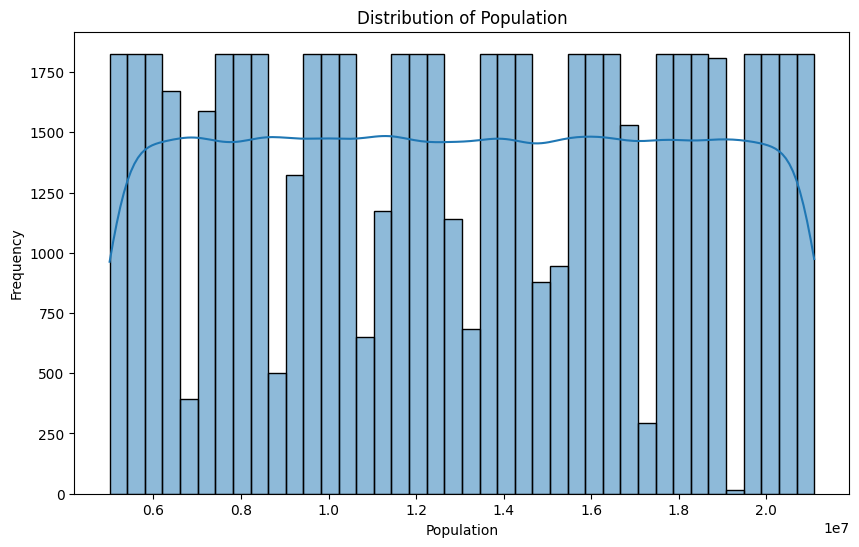

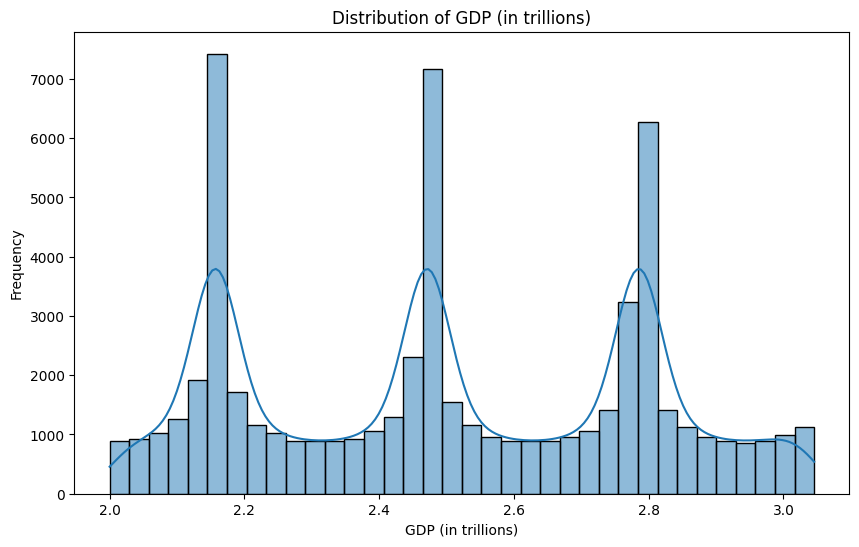

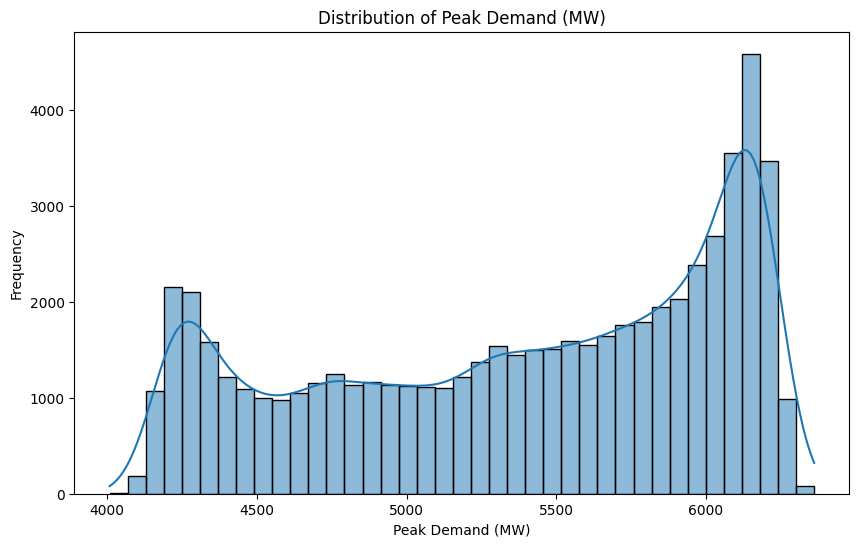

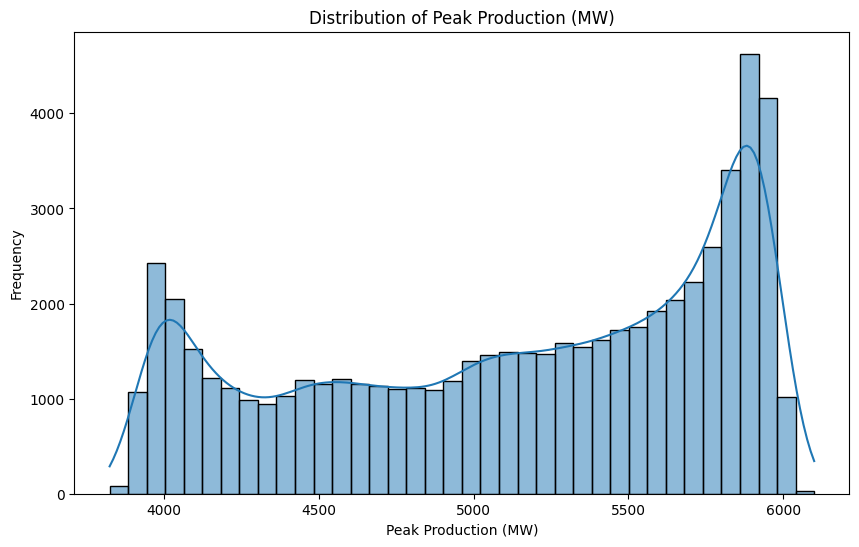

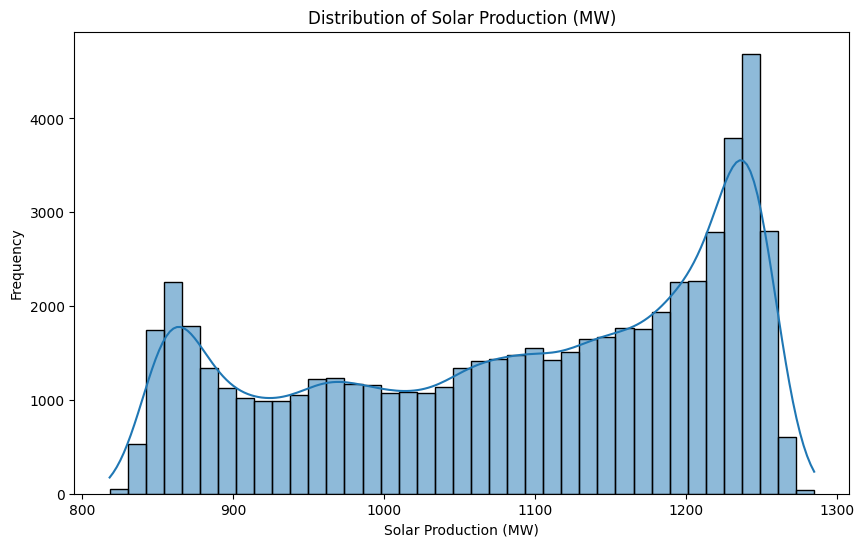

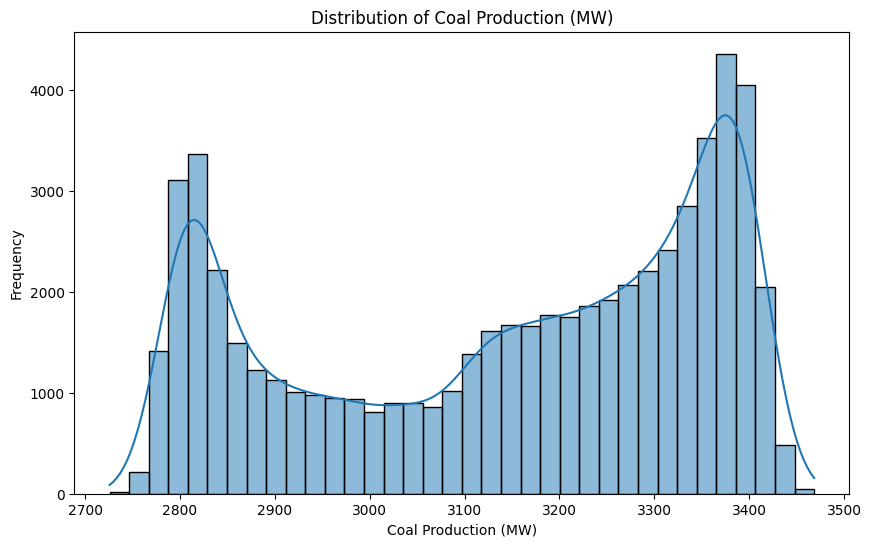

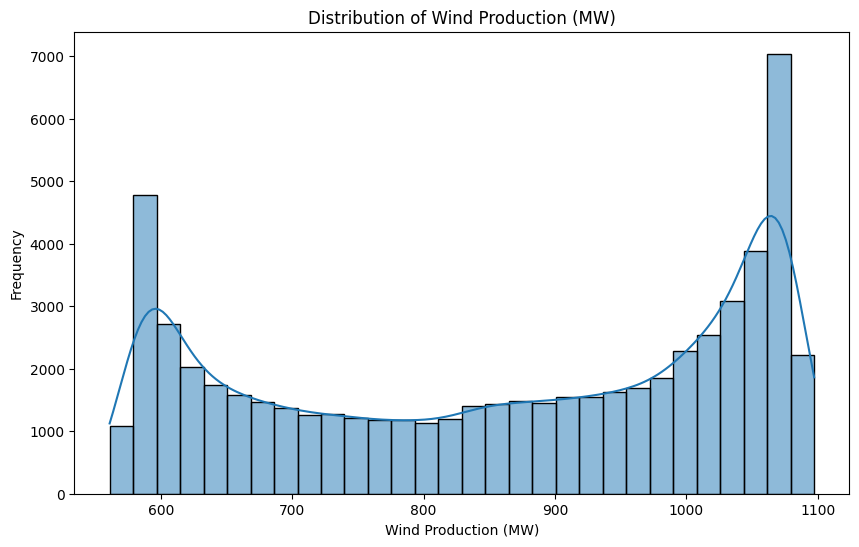

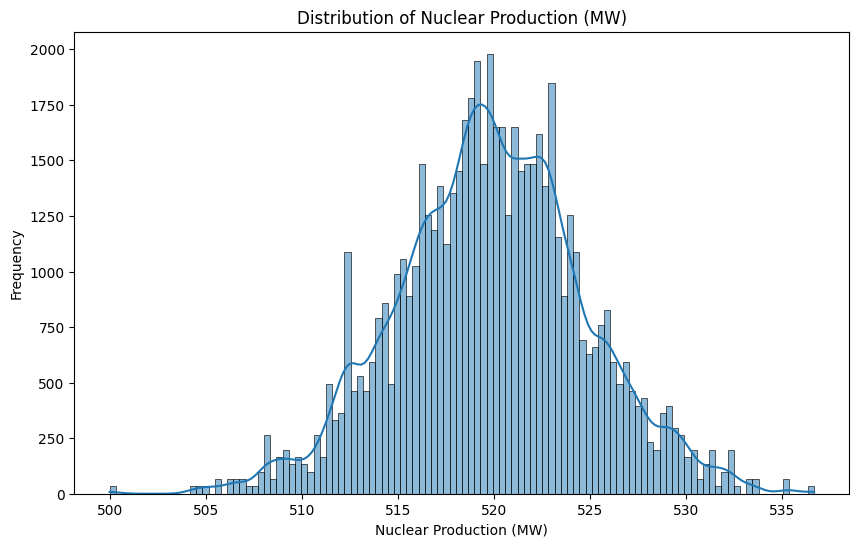

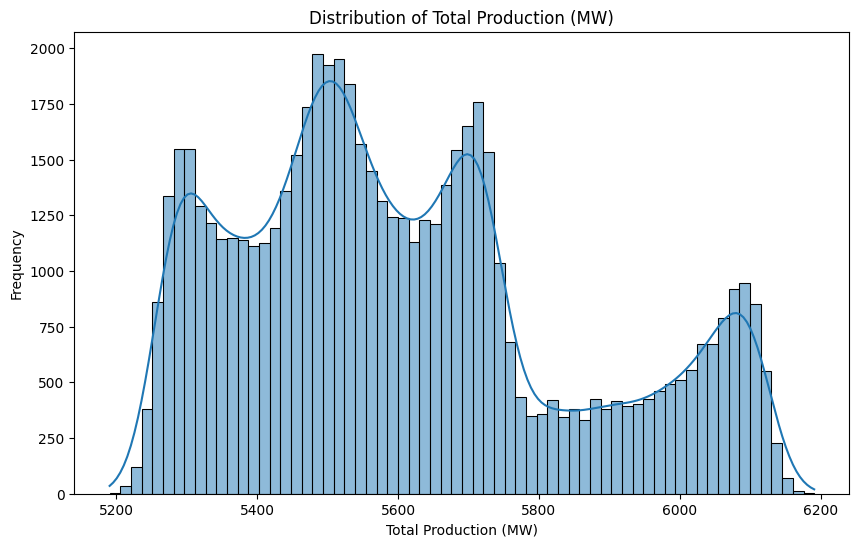

In [14]:
for col in num_cols:
    plt.figure(figsize = (10, 6))
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



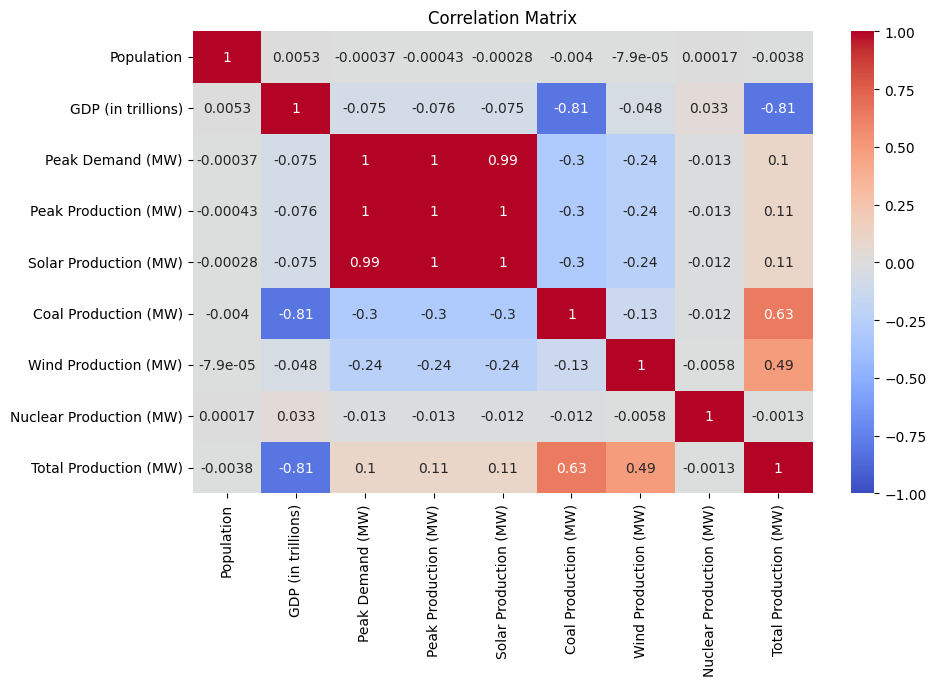

In [15]:
plt.figure(figsize = (10, 6))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()


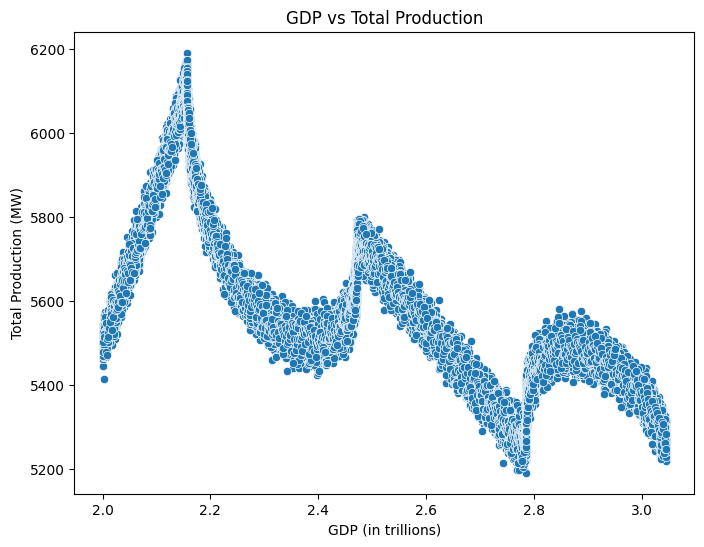

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP (in trillions)', y='Total Production (MW)')
plt.title("GDP vs Total Production")
plt.xlabel("GDP (in trillions)")
plt.ylabel("Total Production (MW)")
plt.show()

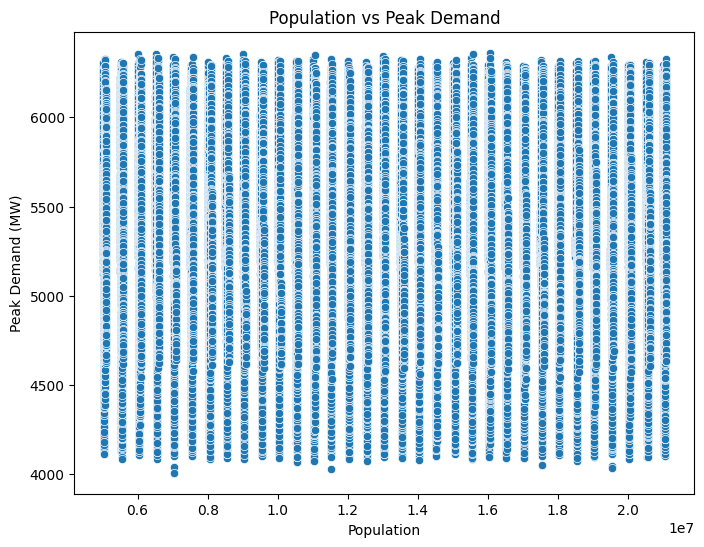

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Population', y='Peak Demand (MW)')
plt.title("Population vs Peak Demand")
plt.xlabel("Population")
plt.ylabel("Peak Demand (MW)")
plt.show()



<Figure size 1000x800 with 0 Axes>

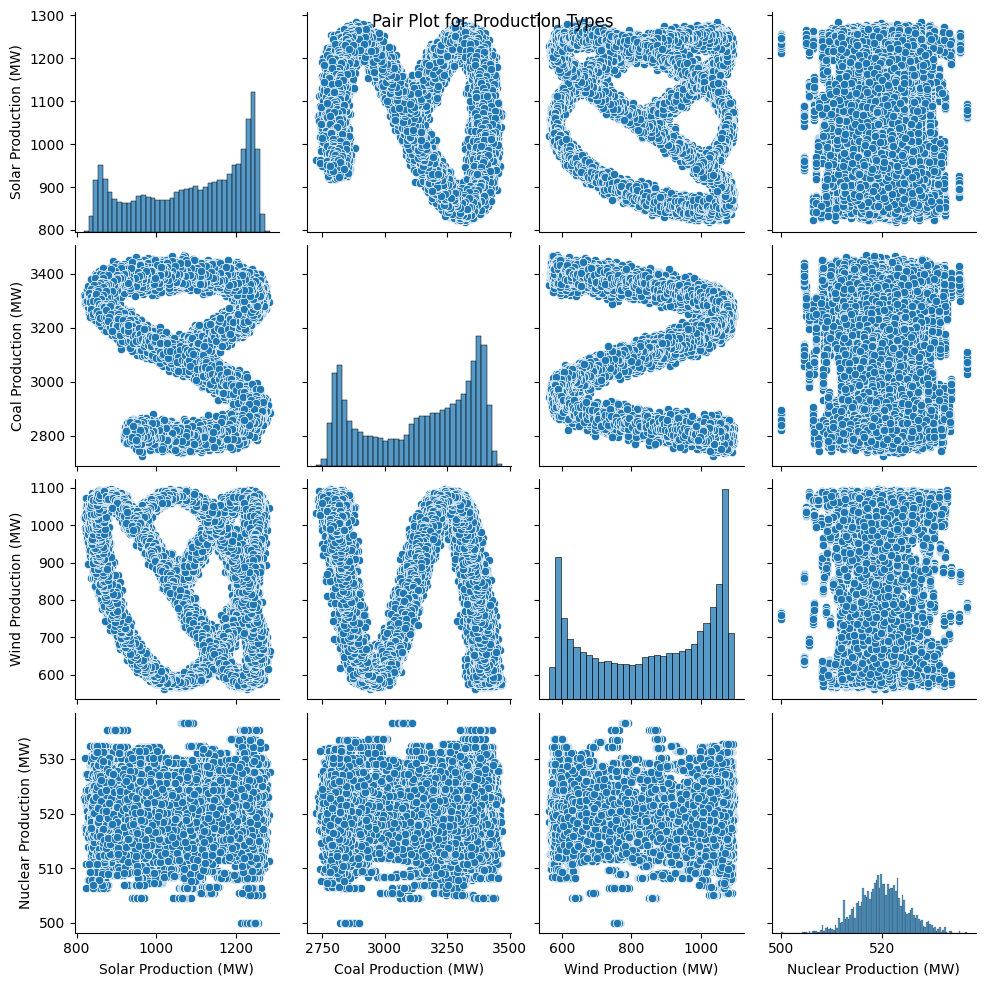

In [18]:
production_types = ['Solar Production (MW)', 'Coal Production (MW)', 'Wind Production (MW)', 'Nuclear Production (MW)']
plt.figure(figsize=(10, 8))
sns.pairplot(df[production_types])
plt.suptitle("Pair Plot for Production Types")
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

df['State_encoded'] = le.fit_transform(df['State'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [27]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(forecast_horizon))


c:\Users\Mohak Singh\Desktop\Desktop Main\Projects\SIH-24 project\Version 2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(optimizer=Adam  (learning_rate=0.001), loss='mean_squared_error')


In [30]:
checkpoint = ModelCheckpoint('best_model.keras', monitor = 'val_loss', save_best_only=True, mode = 'min', verbose = 1)

In [32]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'min', restore_best_weights = True)

In [34]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint, earlystopping])

Epoch 1/50
1504/1506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0996
Epoch 1: val_loss improved from inf to 0.01656, saving model to best_model.keras
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0995 - val_loss: 0.0166
Epoch 2/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0244
Epoch 2: val_loss improved from 0.01656 to 0.01144, saving model to best_model.keras
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0244 - val_loss: 0.0114
Epoch 3/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223
Epoch 3: val_loss did not improve from 0.01144
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0223 - val_loss: 0.0124
Epoch 4/50
1501/1506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216
Epoch 4: val_loss did not improve from 0.01144
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0216 - val_loss: 0.0117
Epoch 5/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211
Epoch 5: val_loss did not improve from 0.01144
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 11s 7